<a href="https://colab.research.google.com/github/FulISun/AI_ML-DL_Intermediate/blob/main/01_linear_and_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-learn을 이용한 선형회귀와 로지스틱 회귀

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

cm2 = ListedColormap(['C1', 'C2'])
cm2_inv = ListedColormap(['C2', 'C1'])

## 데이터 로드

In [5]:
D = np.load('basic_clfreg.npz')

In [6]:
X_clf = D['X_clf']
y_clf = D['y_clf']

X_reg = D['X_reg']
y_reg = D['y_reg']

In [7]:
D['X_clf']

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

## 데이터 확인

### 회귀 데이터

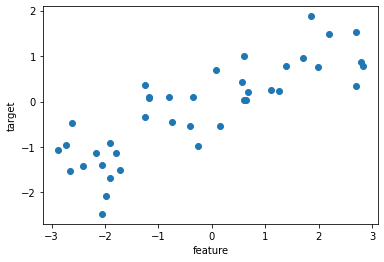

In [8]:
fig = plt.figure()
ax = plt.axes()

ax.plot(X_reg, y_reg, 'o')

ax.set_xlabel('feature')
ax.set_ylabel('target')

plt.show()

### 분류 데이터

In [9]:
X_clf

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [10]:
X_clf[y_clf == 0][:,1] # 열 하나만 확인

array([-0.16816717,  1.54322016,  4.28695977, -0.20283165,  1.48709629,
       -0.63993225,  1.29564214,  2.49162431,  0.99078055, -0.26430318,
        1.63824349,  1.93824624,  1.3389402 ])

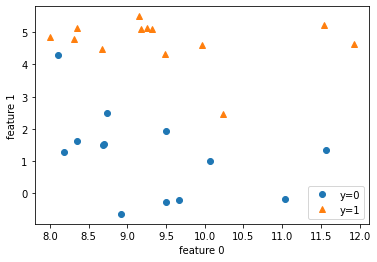

In [11]:
fig = plt.figure()
ax = plt.axes()

# 데이터를 타겟 종류에 따라 뿌리기
ax.plot(X_clf[ y_clf == 0 ][:,0], X_clf[ y_clf == 0 ][:,1], 'o', label = 'y=0')
ax.plot(X_clf[ y_clf == 1 ][:,0], X_clf[ y_clf == 1 ][:,1], '^', label = 'y=1')

ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')

ax.legend()

plt.show()

### 데이터 학습, 테스트 세트로 나누기

In [23]:
# train, test set으로 나누기
from sklearn.model_selection import train_test_split

X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, random_state = 66)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, random_state = 66)

In [24]:
X_reg_train # N, D

array([[ 0.08540663],
       [ 1.85038409],
       [-2.41396732],
       [ 1.39196365],
       [-0.35908504],
       [ 0.64526911],
       [ 2.7937922 ],
       [-1.17454654],
       [-1.17231738],
       [ 0.60669007],
       [-1.72596534],
       [-2.06403288],
       [ 0.14853859],
       [-1.9090502 ],
       [ 2.69331322],
       [ 2.19705687],
       [-2.60969044],
       [ 2.70428584],
       [-1.80195731],
       [ 1.99465584],
       [-1.97685526],
       [-0.26358009],
       [-2.65149833],
       [-0.80182894],
       [-2.16303684],
       [-1.25262516],
       [ 1.24843547],
       [ 1.10539816],
       [ 0.59195091],
       [-0.75275929]])

## Linear Regression

In [25]:
# 모델 로드
from sklearn.linear_model import LinearRegression

In [26]:
# fitting
model = LinearRegression()
lr = model.fit(X_reg_train, y_reg_train)

### 학습된 파라미터 확인

In [16]:
# coefficient와 intercept 확인
print(f"w1(lr.coef_):{lr.coef_}") # beta1
print(f"b(lr.intercept_):{lr.intercept_:.6f}") # intercept, 소수점 6째 자리까지

w1(lr.coef_):[0.44197612]
b(lr.intercept_):-0.000795


In [27]:
y_reg_train

array([ 0.69798591,  1.87664889, -1.41502356,  0.77932073,  0.09398858,
        0.03527881,  0.86893293,  0.08448544,  0.0945257 ,  1.00032374,
       -1.51369739, -2.47196233, -0.52734666, -1.67303415,  1.53708251,
        1.49417157, -0.47411033,  0.33122576, -1.13455014,  0.75418806,
       -2.08581717, -0.98618122, -1.52730805,  0.09756349, -1.12469096,
       -0.3409073 ,  0.22956153,  0.25438895,  0.03497884, -0.44822073])

### 성능 확인

In [28]:
# R^2 
print(f"훈련 세트 점수:{lr.score(X_reg_train, y_reg_train):.2f}")
print(f"테스트 세트 점수:{lr.score(X_reg_test, y_reg_test):.2f}")

훈련 세트 점수:0.69
테스트 세트 점수:0.63


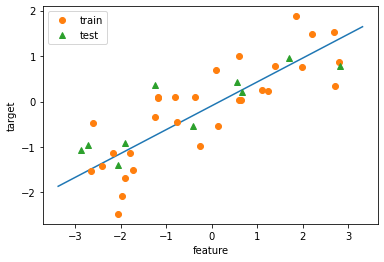

In [29]:
# plot으로 확인

fig = plt.figure
ax = plt.axes()

eps = 0.5
x_min, x_max = X_reg.min() - eps, X_reg.max() + eps
x = np.linspace(x_min, x_max, 100) # x: (100,) => 1차원 array
y_lr = lr.predict(x.reshape(-1,1)) # x: (100,1) => 2차원 array
ax.plot(x, y_lr)

ax.plot(X_reg_train, y_reg_train, 'o', label='train')
ax.plot(X_reg_test, y_reg_test, '^', label='test')
ax.legend()
ax.set_xlabel('feature')
ax.set_ylabel('target')

plt.show()

## Ridge Regression (L2 규제)

* 모델에 규제항 추가
* 규제가 없으면 학습데이터에 최대한 맞추게 됨
* 규제는 최대한 학습데이터에 모델을 맞추는 현상을 억제하게 되므로 규제 regularization이라고 함
* 결과적으로 학습데이터에 약간 덜 맞더라도 테스트 데이터는 조금 더 잘 맞는 일반화된 모델 만들기 위한 목적!!

In [30]:
# 모델 로드
from sklearn.linear_model import Ridge

In [31]:
# fitting
model = Ridge(alpha=1.0)
ridge = model.fit(X_reg_train, y_reg_train)

* alpha는 규제의 강도를 조절하는 숫자로 크면 클수록 규제가 강해짐
* alpha 기본값: alpha=1

### 성능확인

In [32]:
# alpha값을 3, 8. 30으로 바꿔가며 test set에 대한 R2 score 확인
for alpha in [3, 8, 30]:
    model = Ridge(alpha=alpha)
    ridge = model.fit(X_reg_train, y_reg_train) # 학습
    print(f"alpha={alpha}, 훈련 세트 점수:{ridge.score(X_reg_train, y_reg_train):.2f}")
    print(f"alpha={alpha}, 테스트 세트 점수:{ridge.score(X_reg_test, y_reg_test):.2f}")
    print()

alpha=3, 훈련 세트 점수:0.69
alpha=3, 테스트 세트 점수:0.65

alpha=8, 훈련 세트 점수:0.68
alpha=8, 테스트 세트 점수:0.69

alpha=30, 훈련 세트 점수:0.64
alpha=30, 테스트 세트 점수:0.75





* alpha가 커지면 w가 작아지면서 규제가 크게 걸림
* 작동 방식: 학습하는 w가 잘 움직이지 못하도록 막아서 모델의 적응범위를 한정하는 원리
$$
MSE = \frac{1}{2}\sum_i^N (\hat{y}_i - y_i)^2 + \frac{\alpha}{2} \sum_{j=1}^D w_j^2
$$
* 오차 함수에 w를 더하기 때문에 w가 커지면 오차가 커짐



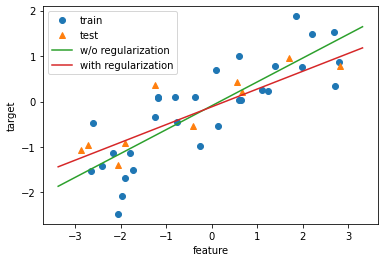

In [40]:
# 그림으로 확인

fig = plt.figure()
ax = plt.axes()
eps = 0.5

x_min, x_max = X_reg.min() - eps, X_reg.max() + eps
x = np.linspace(x_min, x_max, 100) # 독립변수 생성

# y_lr에 lr의 예측을 저장하고, y_ridge_alpha에 ridge의 예측을 저장하여 plot
y_lr = lr.predict(x.reshape(-1,1)) # 예측
y_ridge_alpha = ridge.predict(x.reshape(-1,1))

ax.plot(X_reg_train, y_reg_train, 'o', label = 'train')
ax.plot(X_reg_test, y_reg_test, '^', label = 'test')

ax.plot(x, y_lr, label = 'w/o regularization')
ax.plot(x, y_ridge_alpha, label = 'with regularization')


ax.legend()
ax.set_xlabel('feature')
ax.set_ylabel('target')

plt.show()

# L2 규제를 가한 빨간 선이 test set에 조금 더 근접함을 알 수 있음.
# w들이 더 커지지 못하게 딱 잡기 때문임.

# 이 때, train set에 과하게 적합된 모델을 overfitting 이라 함 => 데이터를 더 수집해야 함
# 반대로 너무 일반화 되어 train set 조차 예측하지 못하는 것을 underfitting => 모델 수정  

### 선형회귀와 릿지회귀 계수 비교

In [41]:
# 내부 속성으로 계수 비교
print(f"w1(lr.coef_):{lr.coef_}")
print(f"w1(ridge.coef_):{ridge.coef_}")

w1(lr.coef_):[0.52424272]
w1(ridge.coef_):[0.39068396]


## Logistic Regression



* 선형회귀의 출력을 로지스틱 시그모이드 함수에 입력하여 0~1사이의 값으로 만들어 분류 문제 해결 
* threshold=0.5보다 크면 1, 작으면 0으로 분류



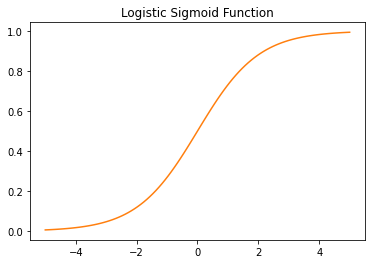

In [43]:
# sigmoid function

x = np.linspace(-5, 5, 100)

fig = plt.figure()
ax = plt.axes()

ax.plot(x, 1/(1+np.exp(-x)), color='C1')
ax.set_title("Logistic Sigmoid Function")

plt.show()

In [44]:
# 모델 로드

from sklearn.linear_model import LogisticRegression

In [45]:
# 규제없는 모델 fitting

model = LogisticRegression(penalty='none')
logreg = model.fit(X_clf_train, y_clf_train)

In [47]:
print(f"학습 세트 정확도: {logreg.score(X_clf_train, y_clf_train):.2f}")
print(f"테스트 세트 정확도: {logreg.score(X_clf_test, y_clf_test):.2f}")

학습 세트 정확도: 1.00
테스트 세트 정확도: 0.71


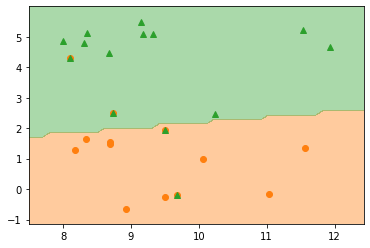

In [59]:
# 그림으로 확인

ngrid = 50
eps = 0.5

# 데이터의 최소, 최대값보다 eps만큼 바깥 영역에서 그리드 설정
x_min, x_max = X_clf[:, 0].min() - eps, X_clf[:, 0].max() + eps
y_min, y_max = X_clf[:, 1].min() - eps, X_clf[:, 1].max() + eps

xx = np.linspace(x_min, x_max, ngrid)
yy = np.linspace(y_min, y_max, ngrid)
X1, X2 = np.meshgrid(xx, yy) # 격자 그리드 생성  X1, X2 = (50, 50)

# 그리드를 1차원으로 펼치고 contour 그릴 레벨 설정
x_grid = np.c_[X1.ravel(), X2.ravel()] # revel() 이용하여 다차원을 1차원 배열로 변경 후 c_로 2차원 배열 만듦
# np.c_: 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기 (= np.concatenate(axis=1) )
# x_grid => (2500, 2)
levels = [0, 0.5, 1]

fig = plt.figure()
ax = plt.axes()

decision_values = logreg.predict(x_grid)

# 결정경계 그리기
ax.contourf(X1, X2, decision_values.reshape(X1.shape),
            levels = levels, colors=['C1', 'C2'],
            alpha=0.4)

# 학습데이터 그리기
ax.plot(X_clf_train[y_clf_train == 0][:,0],
        X_clf_train[y_clf_train == 0][:,1], 'o', color='C1', label='y=0')
ax.plot(X_clf_train[y_clf_train == 1][:,0],
        X_clf_train[y_clf_train == 1][:,1], '^', color='C2', label='y=1')

# 테스트데이터 그리기
ax.plot(X_clf_test[y_clf_test == 0][:,0],
        X_clf_test[y_clf_test == 0][:,1], 'o', color='C1', label='y=0')
ax.plot(X_clf_test[y_clf_test == 0][:,0],
        X_clf_test[y_clf_test == 0][:,1], '^', color='C2', label='y=0')

plt.show()



### 규제항 조정



* c: Inverse of regularization strength, default = 1
* C가 커지면 규제가 사라지고, C가 작아지면 규제가 크게 걸림



In [58]:
# 규제 추가

model = LogisticRegression(C=0.1)
logreg_L2 = model.fit(X_clf_train, y_clf_train)
# 선형회귀와는 반대로 C가 작아야 규제가 커짐

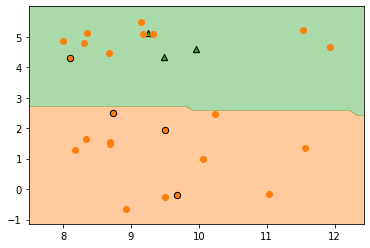


학습데이터 정확도: 0.95
테스트데이터 정확도: 0.86


In [62]:
# 그림으로 확인

ngrid = 50
eps = 0.5

# 데이터의 최소, 최대보다 eps만큼 바깥 영역에서 그리드 설정
x_min, x_max = X_clf[:,0].min() - eps, X_clf[:,0].max() + eps
y_min, y_max = X_clf[:,1].min() - eps, X_clf[:,1].max() + eps
xx = np.linspace(x_min, x_max, ngrid)
yy = np.linspace(y_min, y_max, ngrid)
X1, X2 = np.meshgrid(xx, yy)

# 그리드를 1차원으로 펼치고 contour 그릴 레벨 설정
X_grid = np.c_[X1.ravel(), X2.ravel()]
levels = [0, 0.5, 1]

fig = plt.figure()
ax = plt.axes()

decision_values = logreg_L2.predict(X_grid)

# 결정경계 그리기
ax.contourf(X1, X2, decision_values.reshape(X1.shape),
            levels = levels, colors = ['C1', 'C2'],
            alpha=0.4)

# 학습 데이터 그리기
ax.plot(X_clf_train[ y_clf_train == 0 ][:,0],
        X_clf_train[ y_clf_train == 0 ][:,1], 'o', color='C1', label='y=0')
ax.plot(X_clf_train[ y_clf_train == 1 ][:,0],
        X_clf_train[ y_clf_train == 1 ][:,1], 'o', color='C1', label='y=1')

# 테스트 데이터 그리기
ax.scatter(X_clf_test[y_clf_test==0][:,0],
           X_clf_test[y_clf_test==0][:,1], marker='o', color='C1', edgecolor='k',
           s=40, label='y=0')
ax.scatter(X_clf_test[y_clf_test==1][:,0],
           X_clf_test[y_clf_test==1][:,1], marker='^', color='C2', edgecolor='k',
           s=40, label='y=1')

plt.show()

print()
print(f"학습데이터 정확도: {logreg_L2.score(X_clf_train, y_clf_train):.2f}")
print(f"테스트데이터 정확도: {logreg_L2.score(X_clf_test, y_clf_test):.2f}")

### 실제 분류 문제: 붓꽃 데이터 셋



* iris라는 꽃 3품종에 대한 꽃잎petal, 꽃받침sepal의 너비와 길이 데이터
* 특징은 네 개, 타겟은 세 개
* 아래에서 1차원 분류 문제와 2차원 분류 문제를 예로 분류 문제 감을 익힘



In [63]:
from sklearn.datasets import load_iris

In [64]:
iris = load_iris()

print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#### Simple Logistic Regression



* 2번 타겟 verginica와 그 외 품종으로 변경 즉 바이너리
* 분류 위한 특성은 petal width 사용



In [96]:
iris['data'].shape 

X = iris['data'][:, 3]
X = X.reshape(-1,1)
print(X.shape)

(150, 1)


In [85]:
iris['target'].shape

y = (iris['target'] == 2).astype(int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [97]:
# fitting
model = LogisticRegression()
logreg = model.fit(X, y)

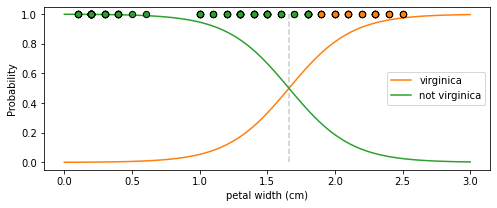

In [105]:
# 그림으로 확인
x = np.linspace(0, 3, 100)

fig = plt.figure(figsize=(8,3))
ax = plt.axes()

# 확률값이 변해가는 곡선 그리기  
y_proba = logreg.predict_proba(x.reshape(-1,1)) # proba값 추출 => (100, 2) : 각 x에 대해 y=0일 prob, y=1일 prob
ax.plot(x, y_proba[:,1], color='C1', label='virginica') 
ax.plot(x, y_proba[:,0], color='C2', label='not virginica')

# 샘플 그리기
ax.scatter(X[y==1], np.ones(X[y==1].shape), marker='o', s=40,
           color='C1', edgecolor='k', zorder=20)
ax.scatter(X[y==0], np.ones(X[y==0].shape), marker='o', s=40,
           color='C2', edgecolor='k', zorder=20)

# 다음 그림에서 결정경계 세로 점선으로 그리기
p = 0.5
dsc_bnd = (-np.log( (1/p)-1) - logreg.intercept_) / logreg.coef_
ax.vlines(dsc_bnd[0], ymin=0, ymax=1, linestyles='--', color='0.8')

ax.set_ylabel('Probability')
ax.set_xlabel('petal width (cm)')

ax.legend()

plt.show()


In [108]:
# 포인트 1.5와 2.0 예측값과 예측 확률을 출력

logreg.predict([[1.5],
                [2.0]]) 
# array([0, 1]) => 1.5일 때 0으로 예측하고 2.0일 때 1로 예측함. plot 결과와 일치하는 것을 알 수 있음
logreg.predict_proba([[1.5],
                      [2.0]]) 

array([[0.66709636, 0.33290364],
       [0.18672067, 0.81327933]])

#### Multiple Logistic Regression



* 2차원 문제: 특성 두개
* petal lenth, petal width



In [109]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [113]:
X = iris['data'][:,2:]
y = (iris['target'] == 2).astype(int)

print(X.shape)

(150, 2)


In [114]:
# fitting

model = LogisticRegression(C=100)
logreg = model.fit(X, y)

In [117]:
print(logreg.coef_) # 회귀계수 2개
print(logreg.intercept_) # 절편 1개

[[5.42084462 9.24110768]]
[-41.6724537]


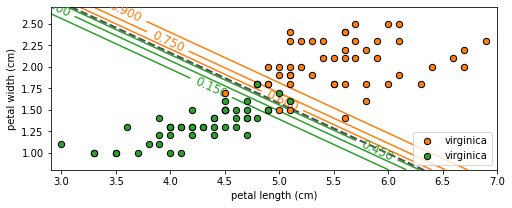

In [119]:
X1, X2 = np.meshgrid(
      np.linspace(2.9,7,500).reshape(-1,1),
      np.linspace(0.8,2.7,200).reshape(-1,1),
    )
X_grid = np.c_[X1.ravel(), X2.ravel()]

fig = plt.figure(figsize=(8,3))
ax = plt.axes()

# 1인 확률값을 함수값으로 지정하고 contour 그리기
y_proba = logreg.predict_proba(X_grid)
Z = y_proba[:,1].reshape(X1.shape)
# 가운데 점선을 경계로 우측 상단은 prob>0.9 이상
contour = ax.contour(X1, X2, Z, cmap=cm2_inv)
ax.clabel(contour, inline=True, fontsize=12)

left_right = np.array([3,7])
boundary = -(logreg.coef_[0][0] * left_right + logreg.intercept_[0]) / logreg.coef_[0][1]
ax.plot(left_right, boundary, "--", color='0.3', linewidth=2)

ax.scatter(X[y==1][:,0], X[y==1][:,1], marker='o', s=40, color='C1',
           edgecolor='k', zorder=20, label='virginica')
ax.scatter(X[y==0][:,0], X[y==0][:,1], marker='o', s=40, color='C2',
           edgecolor='k', zorder=20, label='virginica')

ax.axis([2.9, 7, 0.8, 2.7])
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')
ax.legend()

plt.show()

In [120]:
y_proba[:,1] > 0.6

array([False, False, False, ...,  True,  True,  True])

## 실습 과제: 실제 데이터에 적용

### Classification: 유방암 데이터

최적의 C 찾기

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
      cancer.data, cancer.target, stratify=cancer.target, random_state=42
)

In [128]:
# 로지스틱에서 기본 규제는 C=1

model = LogisticRegression(max_iter = 5000)
logreg = model.fit(X_train, y_train)

print(f"학습데이터셋 정확도: {logreg.score(X_train, y_train):.3f}")
print(f"테스트데이터셋 정확도: {logreg.score(X_test, y_test):.3f}")

# 트레인셋과 테스트셋에서 성능이 거의 비슷하게 나옴 => 성능 끌어올리기 가능하단 소리. => 규제가 필요함
# 패널티를 없이 하는 것도 해보기

학습데이터셋 정확도: 0.958
테스트데이터셋 정확도: 0.958


#### Grid Search

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


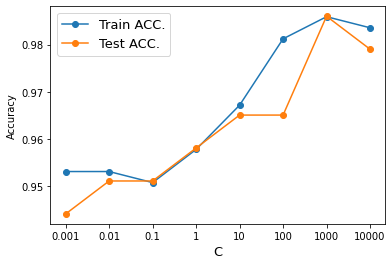

In [129]:
training_accuracy = []
test_accuracy = []

# 적당하게 규제값 설정하고 반복적으로 알고리즘 적용하기
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

fig = plt.figure()
ax = plt.axes()

for C in Cs:
    model = LogisticRegression(C=C, max_iter=5000)
    logreg = model.fit(X_train, y_train)

    training_accuracy.append(logreg.score(X_train, y_train)) # 트레이닝셋 정확도 저장
    test_accuracy.append(logreg.score(X_test, y_test)) # 테스트셋 정확도 저장

# 정확도 그림으로 확인
ax.plot(np.arange(len(Cs)), training_accuracy, 'o-', label='Train ACC.')
ax.plot(np.arange(len(Cs)), test_accuracy, 'o-', label='Test ACC.')

ax.set_xticklabels([0]+Cs)
ax.set_ylabel("Accuracy")
ax.set_xlabel("C", size=13)
ax.legend(fontsize=13)

plt.show()

# Best C = 1000임을 확인할 수 있음

In [131]:
# 규제를 풀어주면 (C를 크게 하면) 성능이 올라감
logreg1000 = LogisticRegression(C=1000, max_iter=5000).fit(X_train, y_train)
print(f"학습데이터 정확도: {logreg1000.score(X_train, y_train):.3f}")
print(f"테스트데이터 정확도: {logreg1000.score(X_test, y_test):.3f}")

학습데이터 정확도: 0.986
테스트데이터 정확도: 0.986


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [132]:
# 규제를 강하게 걸면 (C를 작게 하면) 성능이 떨어짐
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print(f"학습데이터 정확도: {logreg001.score(X_train, y_train):.3f}")
print(f"테스트데이터 정확도: {logreg001.score(X_test, y_test):.3f}")


학습데이터 정확도: 0.953
테스트데이터 정확도: 0.951


### Regression: 보스턴 집값 데이터

최적의 alpha 찾기

In [152]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge

boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.2, random_state=0
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

#### Grid Search

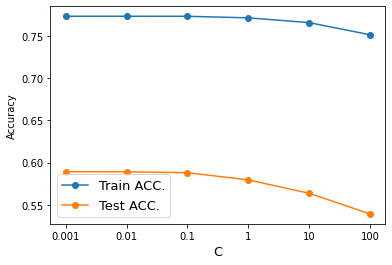

[0.7730135502455627, 0.773012899349382, 0.7729570701425958, 0.7711260446978171, 0.7654833147221556, 0.7511219694364966] 
 [0.5892100767475461, 0.5890993204933792, 0.5880003503393505, 0.5796111714164922, 0.5637257357223815, 0.5393206876381224]


In [154]:
training_accuracy = []
test_accuracy = []

fig = plt.figure()
ax = plt.axes()

alphas = [0.001, 0.01, 0.1, 1, 10, 100] # 클수록 규제가 강하게 걸림

for alpha in alphas:
    
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)

    training_accuracy.append(ridge.score(X_train, y_train))
    test_accuracy.append(ridge.score(X_test, y_test))

# 정확도 그림으로 확인

ax.plot(np.arange(len(alphas)), training_accuracy, 'o-', label='Train ACC.')
ax.plot(np.arange(len(alphas)), test_accuracy, 'o-', label='Test ACC.')

ax.set_xticklabels([0]+alphas)
ax.set_ylabel("Accuracy")
ax.set_xlabel("C", size=13)
ax.legend(fontsize=13)

plt.show()

print(training_accuracy, '\n', test_accuracy)

# Under fitting 되고 있음 => 모델 바꾸기!! 

In [155]:
print(f"훈련세트 정확도: {ridge.score(X_train, y_train):.3f}")
print(f"테스트세트 정확도: {ridge.score(X_test, y_test):.3f}")

훈련세트 정확도: 0.751
테스트세트 정확도: 0.539


## 다중분류 문제

softmax 함수를 쓰는 예외적인 경우를 제외하고, 기본적으로 이진분류만 지원하기 때문에 one-vs-rest 전략을 사용한다

### 데이터 생성

In [156]:
from sklearn.datasets import make_blobs

In [159]:
X, y = make_blobs(random_state=42)

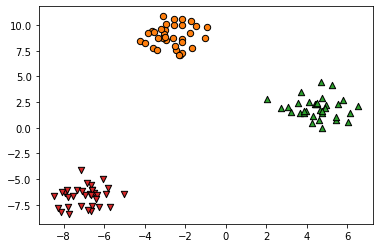

In [160]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(X[y==0][:,0], X[y==0][:,1], marker='o', s=40, color='C1', edgecolor='k')
ax.scatter(X[y==1][:,0], X[y==1][:,1], marker='^', s=40, color='C2', edgecolor='k')
ax.scatter(X[y==2][:,0], X[y==2][:,1], marker='v', s=40, color='C3', edgecolor='k')

plt.show()

### One-vs-Rest 전략

위와 같은 3클래스 분류 문제에서 다음과 같은 데이터 세트 세개에 대해 각각 분류기를 만드는 방식으로 동작 => 즉, 모델을 3개 만듦

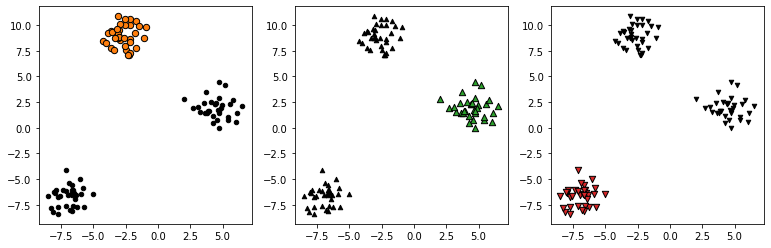

In [161]:
fig, ax = plt.subplots(figsize=(13,4), nrows=1, ncols=3)
markers = ['o', '^', 'v']

for i in range(3):
    ax[i].scatter(X[y==i][:,0], X[y==i][:,1],
                  marker=markers[i], s=40, color=f'C{i+1}', edgecolor='k')
    ax[i].scatter(X[y!=i][:,0], X[y!=i][:,1],
                  marker=markers[i], s=20, color='k', edgecolor='k')    
    
plt.show()



* 각 k개 분류기가 개별적으로 학습됨
* 예측을 위해 다음 식으로 최적의 k번째 분류기 선택
$$
\hat{k} = \underset{k}{\text{argmax}} \,\, \mathbf{w}_k^T\mathbf{x} + b_k
$$
* 이렇게 각각 세 번 세개의 분류기를 학습하는 방식을 One-vs-Rest 전략이라고 함



In [162]:
# 모델 생성과 fitting

model = LogisticRegression(multi_class='ovr')
logreg = model.fit(X, y)

In [163]:
# 한 행이 분류기 하나를 의미함

logreg.coef_
# coef가 3세트

array([[-0.68329705,  1.06169509],
       [ 1.36537961, -0.32670774],
       [-0.61161973, -0.73287599]])

In [164]:
logreg.intercept_
# 절편도 3개

array([-5.28341212,  0.54307525, -2.64719253])

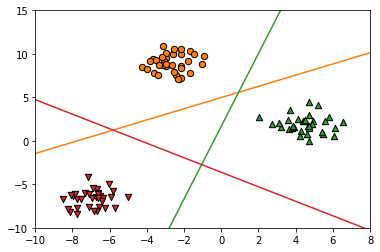

In [166]:
# 각 분류기의 결정 경계

fig = plt.figure()
ax = plt.axes()

ax.scatter(X[y==0][:,0], X[y==0][:,1], marker='o', s=40, color='C1', edgecolor='k')
ax.scatter(X[y==1][:,0], X[y==1][:,1], marker='^', s=40, color='C2', edgecolor='k')
ax.scatter(X[y==2][:,0], X[y==2][:,1], marker='v', s=40, color='C3', edgecolor='k')

x = np.linspace(-10, 8)
for coef, intercept, color in zip(logreg.coef_, logreg.intercept_, ['C1', 'C2', 'C3']):
    plt.plot(x, -(x*coef[0] + intercept) / coef[1], c=color)

ax.set_ylim(-10,15)
ax.set_xlim(-10,8)

plt.show()





* 결정경계를 보면 두 클래스가 동시에 포함되는 경우가 있는데 이때는 선형식의 결과값(스코어)로 결정
* 예를 들어 가운데 삼각형 영역은 세 클래스 모두 해당되지 않지만 스코어로 영역을 그려보면



In [167]:
from matplotlib.colors import ListedColormap
cm3 = ListedColormap(['C1', 'C2', 'C3'])

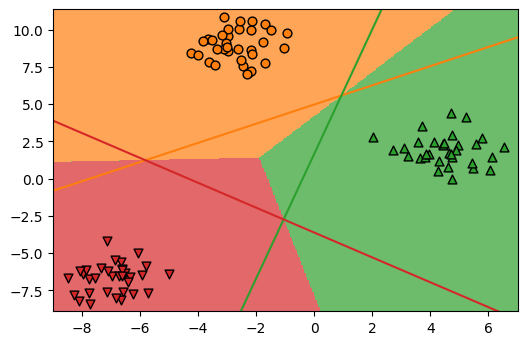

In [168]:
# 그림으로 확인
ngrid = 300
eps = 0.5

# 데이터의 최소, 최대값 보다 eps만큼 바깥 영역에서 그리드를 짠다.
x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
xx = np.linspace(x_min, x_max, ngrid)
yy = np.linspace(y_min, y_max, ngrid)
X1, X2 = np.meshgrid(xx, yy)

# 그리드를 1차원을 펼치고 contour를 그릴 레벨설정
X_grid = np.c_[X1.ravel(), X2.ravel()]

fig = plt.figure(dpi=100)
ax = plt.axes()

ax.scatter(X[y==0][:,0], X[y==0][:,1], marker='o', s=40, color='C1', edgecolor='k')
ax.scatter(X[y==1][:,0], X[y==1][:,1], marker='^', s=40, color='C2', edgecolor='k')
ax.scatter(X[y==2][:,0], X[y==2][:,1], marker='v', s=40, color='C3', edgecolor='k')

x = np.linspace(-10, 8)
for coef, intercept, color in zip(logreg.coef_, logreg.intercept_, cm3.colors):
    plt.plot(x, -(x * coef[0] + intercept) / coef[1], c=color)

decision_values = logreg.predict(X_grid)

# 결정경계를 그리고
ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max, y_min, y_max),
              aspect='auto', origin='lower', alpha=0.7, cmap=cm3)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.show()

* 데이터가 가까운 쪽으로 결정됨

### softmax 회귀: multinomial logistic

* multi_class='multinomial'로 설정
* ovl 방식이 개별 분류기라면 소프트맥스는 한 번에 모든 분류기 학습
* 여러 분류기의 출력을 개별 로지스틱 시그모이드에 이력하지 않고 소프트 맥수 함수에 입력하여 한꺼번에 확률 값으로 변환
$$
\text{softmax}_j(\mathbf{z}) = \frac{e^{z_j}}{\sum_{k}e^{z_k}}
$$

In [169]:
# 모델 생성과 fitting

logreg = LogisticRegression(multi_class='multinomial').fit(X,y)

In [170]:
logreg.coef_

array([[-0.38486163,  0.62874226],
       [ 0.74106233, -0.17664082],
       [-0.3562007 , -0.45210144]])

In [171]:
logreg.intercept_

array([-1.63102014,  1.85764971, -0.22662957])

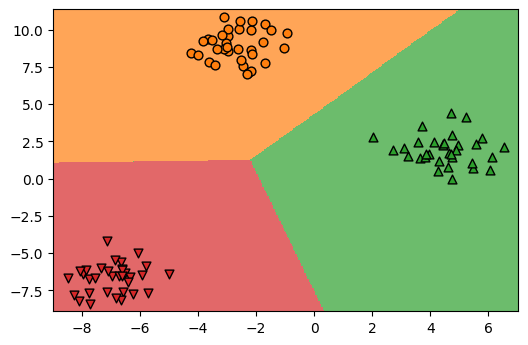

In [172]:
# 그림으로 확인
ngrid = 300
eps = 0.5

# 데이터의 최소, 최대값 보다 eps만큼 바깥 영역에서 그리드를 짠다.
x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
xx = np.linspace(x_min, x_max, ngrid)
yy = np.linspace(y_min, y_max, ngrid)
X1, X2 = np.meshgrid(xx, yy)

# 그리드를 1차원을 펼치고 contour를 그릴 레벨설정
X_grid = np.c_[X1.ravel(), X2.ravel()]
levels = [0, 0.5, 1, 1.5, 2.0] 

fig = plt.figure(dpi=100)
ax = plt.axes()

ax.scatter(X[y==0][:,0], X[y==0][:,1], marker='o', s=40, color='C1', edgecolor='k')
ax.scatter(X[y==1][:,0], X[y==1][:,1], marker='^', s=40, color='C2', edgecolor='k')
ax.scatter(X[y==2][:,0], X[y==2][:,1], marker='v', s=40, color='C3', edgecolor='k')

decision_values = logreg.predict(X_grid)

# 결정경계를 그리고                          이거 없으면 0,0에서 부터 그리기 시작
ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max, y_min, y_max), 
              aspect='auto', origin='lower', alpha=0.7, cmap=cm3)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.show()